In [1]:
#Importacion de librerias y creacion inicial de los dataframe por cada estacion de medicion
import pandas as pd
from sklearn.impute import SimpleImputer #Reemplazo de datos faltantes
import numpy as np
import matplotlib.pyplot as plt

df_tablaGN = pd.DataFrame()
df_tablaPC = pd.DataFrame()
df_tablaCD = pd.DataFrame()

In [2]:
#Lectura y agrupamiento de ficheros con la informacion de las distintas estaciones de medicion de la contaminacion en 
# los distintos años
for anio in range(17,20) :
    df_GN = pd.read_csv('D:/lvs/Master/ProyectoTFM/datos/contaminacion_GN_20'+str(anio)+'01-12.csv')
    df_tablaGN = pd.concat([df_tablaGN, df_GN]) 
    
    df_PC = pd.read_csv('D:/lvs/Master/ProyectoTFM/datos/contaminacion_PC_20'+str(anio)+'01-12.csv')
    df_tablaPC = pd.concat([df_tablaPC, df_PC])
    
    df_CD = pd.read_csv('D:/lvs/Master/ProyectoTFM/datos/contaminacion_CD_20'+str(anio)+'01-12.csv')
    df_tablaCD = pd.concat([df_tablaCD, df_CD])

In [3]:
## Descripcion de los datos por estacion de medicion.

In [4]:
#df_tablaGN[['SO2_Media','SO2_Mediana','SO2_Max','SO2_Min','PART_Media','PART_Mediana','PART_Max','PART_Min','NO2_Media', 'NO2_Mediana', 'NO2_Max']].describe()
#df_tablaGN[['NO2_Min', 'CO_Media', 'CO_Mediana', 'CO_Max', 'CO_Min', 'O3_Media', 'O3_Mediana', 'O3_Max', 'O3_Min']].describe()
df_tablaGN[['SO2_Media', 'PART_Media', 'NO2_Media', 'CO_Media', 'O3_Media']].describe()

,SO2_Media,PART_Media,NO2_Media,CO_Media,O3_Media
count,1050.000000,1033.000000,1043.000000,1026.000000,0.0
mean,5.932795,29.770277,46.588628,668.688730,NaN
std,2.246303,13.901598,17.014693,2670.548558,NaN
min,3.000000,5.000000,10.437500,181.055556,NaN
25%,4.298611,20.298611,34.626901,404.936007,NaN
50%,5.520833,27.527778,44.402778,519.788194,NaN
75%,7.197917,36.722222,56.645833,710.081597,NaN
max,17.937500,125.736111,116.708333,85682.857143,NaN


In [7]:
df_SO2Media = pd.DataFrame()
df_SO2Media["fecha"] = df_tablaGN["fecha"]
df_SO2Media["Granada_Norte"] = df_tablaGN["SO2_Media"]
df_SO2Media = pd.merge(df_SO2Media, df_tablaPC[['fecha', 'SO2_Media']], on='fecha', how='outer').sort_values(by=['fecha'])
df_SO2Media["Palacio_Congresos"] = df_SO2Media["SO2_Media"]
df_SO2Media = pd.merge(df_SO2Media[['fecha', 'Granada_Norte', 'Palacio_Congresos']], df_tablaCD[['fecha', 'SO2_Media']], on='fecha', how='outer').sort_values(by=['fecha'])
df_SO2Media["Armilla"] = df_SO2Media["SO2_Media"]
df_SO2Media = df_SO2Media[['fecha', 'Granada_Norte', 'Palacio_Congresos', 'Armilla']]

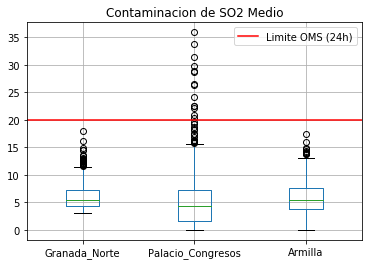

In [23]:
df_SO2Media.boxplot(column=['Granada_Norte', 'Palacio_Congresos', 'Armilla'])
title_boxplot = 'Contaminacion de SO2 Medio'
plt.title(title_boxplot)
plt.suptitle('')
plt.axhline(y=20, xmin=0.0, xmax=1.0, color='r', label='Limite OMS (24h)')
plt.legend(loc='best')
plt.show()

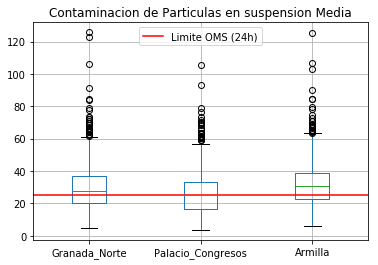

In [22]:
df_PARTMedia = pd.DataFrame()
df_PARTMedia["fecha"] = df_tablaGN["fecha"]
df_PARTMedia["Granada_Norte"] = df_tablaGN["PART_Media"]
df_PARTMedia = pd.merge(df_PARTMedia, df_tablaPC[['fecha', 'PART_Media']], on='fecha', how='outer').sort_values(by=['fecha'])
df_PARTMedia["Palacio_Congresos"] = df_PARTMedia["PART_Media"]
df_PARTMedia = pd.merge(df_PARTMedia[['fecha', 'Granada_Norte', 'Palacio_Congresos']], df_tablaCD[['fecha', 'PART_Media']], on='fecha', how='outer').sort_values(by=['fecha'])
df_PARTMedia["Armilla"] = df_PARTMedia["PART_Media"]
df_PARTMedia = df_PARTMedia[['fecha', 'Granada_Norte', 'Palacio_Congresos', 'Armilla']]
df_PARTMedia.boxplot(column=['Granada_Norte', 'Palacio_Congresos', 'Armilla'])
title_boxplot_part = 'Contaminacion de Particulas en suspension Media'
plt.title(title_boxplot_part)
plt.suptitle('')
plt.axhline(y=25, xmin=0.0, xmax=1.0, color='r', label='Limite OMS (24h)')
plt.legend(loc='best')
plt.show()

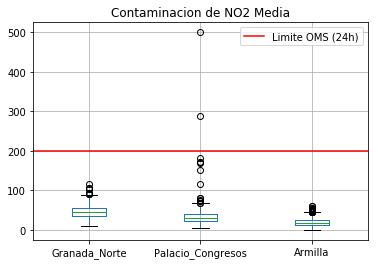

In [21]:
df_NO2_Media = pd.DataFrame()
df_NO2_Media["fecha"] = df_tablaGN["fecha"]
df_NO2_Media["Granada_Norte"] = df_tablaGN["NO2_Media"]
df_NO2_Media = pd.merge(df_NO2_Media, df_tablaPC[['fecha', 'NO2_Media']], on='fecha', how='outer').sort_values(by=['fecha'])
df_NO2_Media["Palacio_Congresos"] = df_NO2_Media["NO2_Media"]
df_NO2_Media = pd.merge(df_NO2_Media[['fecha', 'Granada_Norte', 'Palacio_Congresos']], df_tablaCD[['fecha', 'NO2_Media']], on='fecha', how='outer').sort_values(by=['fecha'])
df_NO2_Media["Armilla"] = df_NO2_Media["NO2_Media"]
df_NO2_Media = df_NO2_Media[['fecha', 'Granada_Norte', 'Palacio_Congresos', 'Armilla']]
df_NO2_Media.boxplot(column=['Granada_Norte', 'Palacio_Congresos', 'Armilla'])
title_boxplot_part = 'Contaminacion de NO2 Media'
plt.title(title_boxplot_part)
plt.suptitle('')
plt.axhline(y=200, xmin=0.0, xmax=1.0, color='r', label='Limite OMS (24h)')
plt.legend(loc='best')
plt.show()

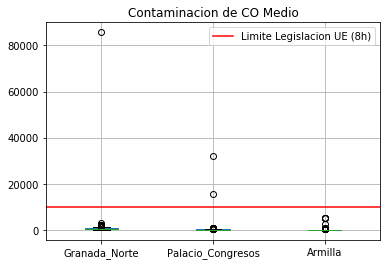

In [24]:
df_CO_Media = pd.DataFrame()
df_CO_Media["fecha"] = df_tablaGN["fecha"]
df_CO_Media["Granada_Norte"] = df_tablaGN["CO_Media"]
df_CO_Media = pd.merge(df_CO_Media, df_tablaPC[['fecha', 'CO_Media']], on='fecha', how='outer').sort_values(by=['fecha'])
df_CO_Media["Palacio_Congresos"] = df_CO_Media["CO_Media"]
df_CO_Media = pd.merge(df_CO_Media[['fecha', 'Granada_Norte', 'Palacio_Congresos']], df_tablaCD[['fecha', 'CO_Media']], on='fecha', how='outer').sort_values(by=['fecha'])
df_CO_Media["Armilla"] = df_CO_Media["CO_Media"]
df_CO_Media = df_CO_Media[['fecha', 'Granada_Norte', 'Palacio_Congresos', 'Armilla']]
df_CO_Media.boxplot(column=['Granada_Norte', 'Palacio_Congresos', 'Armilla'])
title_boxplot_part = 'Contaminacion de CO Medio'
plt.title(title_boxplot_part)
plt.suptitle('')
plt.axhline(y=10000, xmin=0.0, xmax=1.0, color='r', label='Limite Legislacion UE (8h)')
plt.legend(loc='best')
plt.show()

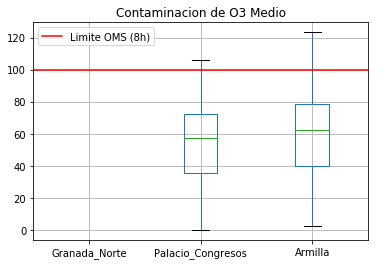

In [20]:
df_O3_Media = pd.DataFrame()
df_O3_Media["fecha"] = df_tablaGN["fecha"]
df_O3_Media["Granada_Norte"] = df_tablaGN["O3_Media"]
df_O3_Media = pd.merge(df_O3_Media, df_tablaPC[['fecha', 'O3_Media']], on='fecha', how='outer').sort_values(by=['fecha'])
df_O3_Media["Palacio_Congresos"] = df_O3_Media["O3_Media"]
df_O3_Media = pd.merge(df_O3_Media[['fecha', 'Granada_Norte', 'Palacio_Congresos']], df_tablaCD[['fecha', 'O3_Media']], on='fecha', how='outer').sort_values(by=['fecha'])
df_O3_Media["Armilla"] = df_O3_Media["O3_Media"]
df_O3_Media = df_O3_Media[['fecha', 'Granada_Norte', 'Palacio_Congresos', 'Armilla']]
df_O3_Media.boxplot(column=['Granada_Norte', 'Palacio_Congresos', 'Armilla'])
title_boxplot_part = 'Contaminacion de O3 Medio'
plt.title(title_boxplot_part)
plt.suptitle('')
plt.axhline(y=100, xmin=0.0, xmax=1.0, color='r', label='Limite OMS (8h)')
plt.legend(loc='best')
plt.show()

In [25]:
df_tablaPC.describe()

,SO2_Media,SO2_Mediana,SO2_Max,SO2_Min,PART_Media,PART_Mediana,PART_Max,PART_Min,NO2_Media,NO2_Mediana,NO2_Max,NO2_Min,CO_Media,CO_Mediana,CO_Max,CO_Min,O3_Media,O3_Mediana,O3_Max,O3_Min
count,987.000000,987.000000,987.000000,987.000000,1023.000000,1023.000000,1023.000000,1023.000000,973.000000,973.000000,973.000000,973.000000,917.000000,917.000000,917.000000,917.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,5.292139,4.177812,23.824721,1.786221,26.406409,24.074291,72.012708,11.645161,33.757542,30.533916,85.636177,9.229188,280.395118,257.432388,628.202835,171.789531,53.667062,52.152409,95.572271,11.526057
std,4.810467,4.775120,22.098633,3.632998,13.345959,13.029691,41.545708,9.974635,24.021918,25.170864,33.612492,20.415436,1173.520492,1173.576045,1238.372940,1169.473957,22.243077,23.410564,27.565151,12.086042
min,0.000000,0.000000,0.000000,0.000000,3.555556,0.000000,9.000000,0.000000,3.972222,0.000000,7.000000,0.000000,1.222222,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.559028,0.000000,9.000000,0.000000,16.850694,15.000000,43.000000,4.000000,22.826389,18.500000,67.000000,5.000000,155.701389,135.500000,322.000000,94.000000,35.611111,34.000000,75.000000,2.000000
50%,4.423611,3.000000,18.000000,0.000000,25.090278,22.000000,64.000000,9.000000,30.284722,25.500000,83.000000,7.000000,208.416667,198.500000,467.000000,117.000000,57.380000,57.000000,96.000000,7.000000
75%,7.234884,6.000000,32.000000,2.000000,33.492903,31.000000,92.000000,17.000000,41.133803,37.000000,101.000000,10.000000,280.409722,239.500000,668.000000,132.000000,72.180556,71.000000,116.000000,18.000000
max,35.909722,36.000000,227.000000,33.000000,105.569444,101.000000,302.000000,71.000000,500.000000,500.000000,500.000000,500.000000,32061.000000,32061.000000,32061.000000,32061.000000,106.062500,112.500000,175.000000,71.000000


In [91]:
#df_tablaPC[['SO2_Media','SO2_Mediana','SO2_Max','SO2_Min','PART_Media','PART_Mediana','PART_Max','PART_Min','NO2_Media', 'NO2_Mediana', 'NO2_Max']].describe()
#df_tablaPC[['NO2_Min', 'CO_Media', 'CO_Mediana', 'CO_Max', 'CO_Min', 'O3_Media', 'O3_Mediana', 'O3_Max', 'O3_Min']].describe()
df_tablaPC[['SO2_Media', 'PART_Media', 'NO2_Media', 'CO_Media', 'O3_Media']].describe()

,SO2_Media,PART_Media,NO2_Media,CO_Media,O3_Media
count,987.000000,1023.000000,973.000000,917.000000,1017.000000
mean,5.292139,26.406409,33.757542,280.395118,53.667062
std,4.810467,13.345959,24.021918,1173.520492,22.243077
min,0.000000,3.555556,3.972222,1.222222,0.000000
25%,1.559028,16.850694,22.826389,155.701389,35.611111
50%,4.423611,25.090278,30.284722,208.416667,57.380000
75%,7.234884,33.492903,41.133803,280.409722,72.180556
max,35.909722,105.569444,500.000000,32061.000000,106.062500


In [92]:
#df_tablaCD[['SO2_Media','SO2_Mediana','SO2_Max','SO2_Min','PART_Media','PART_Mediana','PART_Max','PART_Min','NO2_Media', 'NO2_Mediana', 'NO2_Max']].describe()
#df_tablaCD[['NO2_Min', 'CO_Media', 'CO_Mediana', 'CO_Max', 'CO_Min', 'O3_Media', 'O3_Mediana', 'O3_Max', 'O3_Min']].describe()
df_tablaCD[['SO2_Media', 'PART_Media', 'NO2_Media', 'CO_Media', 'O3_Media']].describe()

,SO2_Media,PART_Media,NO2_Media,CO_Media,O3_Media
count,1029.000000,1016.000000,1035.000000,1029.000000,1024.000000
mean,5.724358,31.821555,19.061371,138.707705,59.125345
std,2.787801,14.106611,10.519933,347.646442,23.948156
min,0.000000,6.190476,0.000000,6.173611,2.650000
25%,3.736111,22.755208,11.468750,68.729167,39.734375
50%,5.520833,30.468528,17.937500,98.291667,62.565972
75%,7.631944,39.076803,24.778579,130.208333,78.555556
max,17.361111,125.034722,61.083333,5361.151515,123.230769


In [7]:
## Representacion grafica contaminacion

In [11]:
# Creacion de columna con los meses de los distintos registros para su siguientes agrupamiento
# Extraccion del mes de la columna fecha: df_tablaGN["fecha"].str[0:7]
df_tablaGN["mes"] = df_tablaGN["fecha"].str[5:7]
df_tablaPC["mes"] = df_tablaPC["fecha"].str[5:7]
df_tablaCD["mes"] = df_tablaCD["fecha"].str[5:7]

In [15]:
mean_tablaGN = df_tablaGN.groupby("mes")['SO2_Media'].mean()
mean_tablaPC = df_tablaPC.groupby("mes")['SO2_Media'].mean()
mean_tablaCD = df_tablaCD.groupby("mes")['SO2_Media'].mean()

import matplotlib.pyplot as plt

fig = plt.figure()
#ax = mean_tablaGN.plot(kind='bar',grid=True)
#ax2 = ax.twinx()
ax2.plot(mean_tablaPC.values, linestyle='-', linewidth=2.0,color='red')
plt.show();



<Figure size 432x288 with 0 Axes>

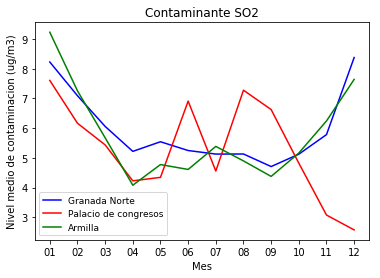

In [42]:
from pylab import * 
#plot(df_tablaGN.groupby("mes")['SO2_Media'].mean(),ejex, 'b-.', df_tablaPC.groupby("mes")['SO2_Media'].mean(),ejex, 'r-.',
#      df_tablaCD.groupby("mes")['SO2_Media'].mean(),ejex, 'g-.')
plot(df_tablaGN.groupby("mes")['SO2_Media'].mean(), 'b-')
plot(df_tablaPC.groupby("mes")['SO2_Media'].mean(), 'r-')
plot(df_tablaCD.groupby("mes")['SO2_Media'].mean(), 'g-')
xlabel('Mes')
ylabel('Nivel medio de contaminacion (ug/m3)')
title('Contaminante SO2')
legend(('Granada Norte', 'Palacio de congresos', 'Armilla'), prop = {'size': 9}, loc='best')

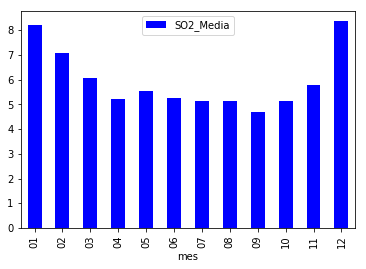

In [51]:
df_tablaGN.groupby("mes")['SO2_Media'].mean().plot(kind = 'bar', legend = 'Reverese', color='blue')

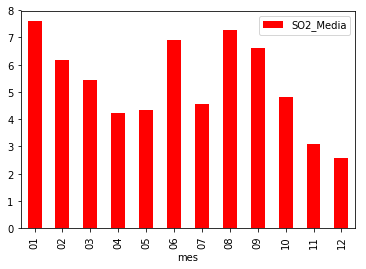

In [52]:
df_tablaPC.groupby("mes")['SO2_Media'].mean().plot(kind = 'bar', legend = 'Reverese', color='red')

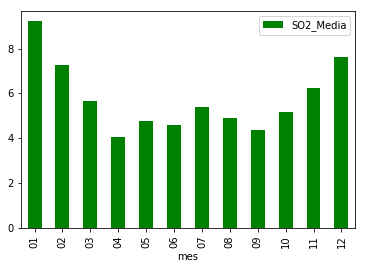

In [53]:
df_tablaCD.groupby("mes")['SO2_Media'].mean().plot(kind = 'bar', legend = 'Reverese', color='green')

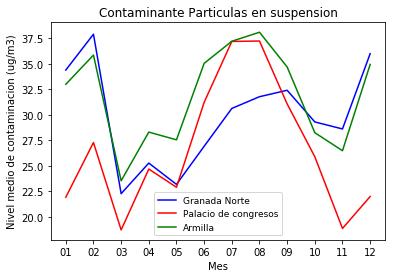

In [70]:
plot(df_tablaGN.groupby("mes")['PART_Media'].mean(), 'b-')
plot(df_tablaPC.groupby("mes")['PART_Media'].mean(), 'r-')
plot(df_tablaCD.groupby("mes")['PART_Media'].mean(), 'g-')
xlabel('Mes')
ylabel('Nivel medio de contaminacion (ug/m3)')
title('Contaminante Particulas en suspension')
legend(('Granada Norte', 'Palacio de congresos', 'Armilla'), prop = {'size': 9}, loc='best')

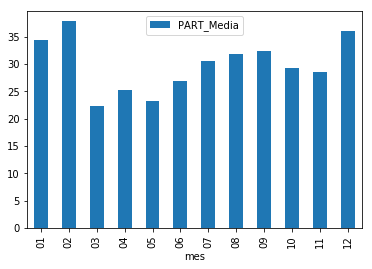

In [54]:
df_tablaGN.groupby("mes")['PART_Media'].mean().plot(kind = 'bar', legend = 'Reverese')

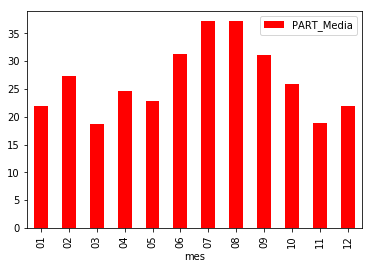

In [55]:
df_tablaPC.groupby("mes")['PART_Media'].mean().plot(kind = 'bar', legend = 'Reverese', color='red')

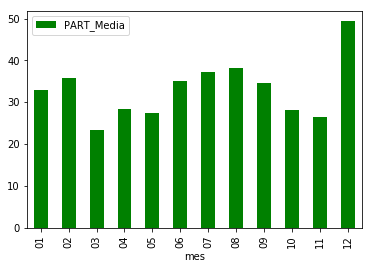

In [56]:
df_tablaCD.groupby("mes")['PART_Media'].mean().plot(kind = 'bar', legend = 'Reverese', color='green')

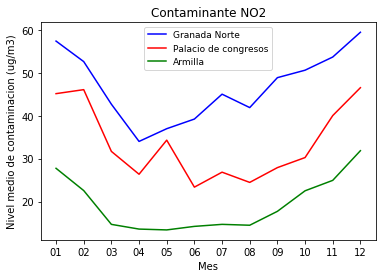

In [44]:
plot(df_tablaGN.groupby("mes")['NO2_Media'].mean(), 'b-')
plot(df_tablaPC.groupby("mes")['NO2_Media'].mean(), 'r-')
plot(df_tablaCD.groupby("mes")['NO2_Media'].mean(), 'g-')
xlabel('Mes')
ylabel('Nivel medio de contaminacion (ug/m3)')
title('Contaminante NO2')
legend(('Granada Norte', 'Palacio de congresos', 'Armilla'), prop = {'size': 9}, loc='best')

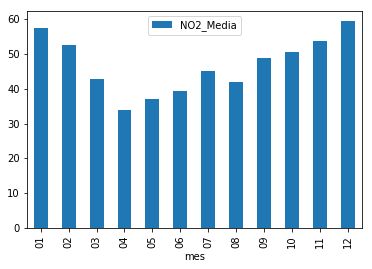

In [57]:
df_tablaGN.groupby("mes")['NO2_Media'].mean().plot(kind = 'bar', legend = 'Reverese')

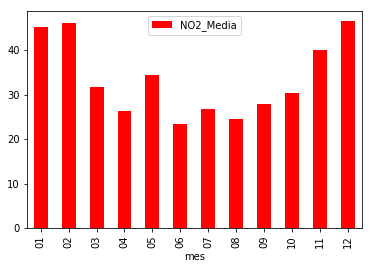

In [58]:
df_tablaPC.groupby("mes")['NO2_Media'].mean().plot(kind = 'bar', legend = 'Reverese', color='red')

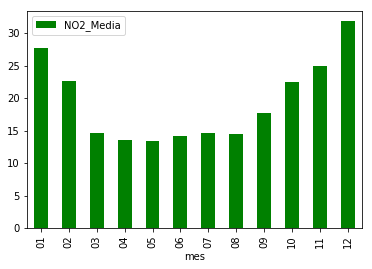

In [59]:
df_tablaCD.groupby("mes")['NO2_Media'].mean().plot(kind = 'bar', legend = 'Reverese', color='green')

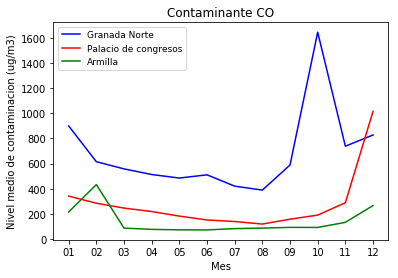

In [45]:
plot(df_tablaGN.groupby("mes")['CO_Media'].mean(), 'b-')
plot(df_tablaPC.groupby("mes")['CO_Media'].mean(), 'r-')
plot(df_tablaCD.groupby("mes")['CO_Media'].mean(), 'g-')
xlabel('Mes')
ylabel('Nivel medio de contaminacion (ug/m3)')
title('Contaminante CO')
legend(('Granada Norte', 'Palacio de congresos', 'Armilla'), prop = {'size': 9}, loc='best')

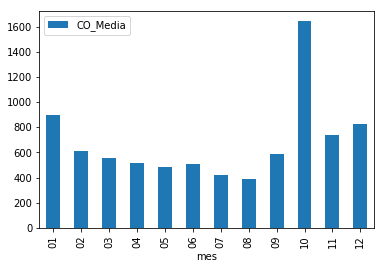

In [60]:
df_tablaGN.groupby("mes")['CO_Media'].mean().plot(kind = 'bar', legend = 'Reverese')

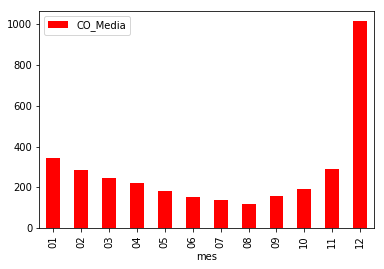

In [61]:
df_tablaPC.groupby("mes")['CO_Media'].mean().plot(kind = 'bar', legend = 'Reverese', color='red')

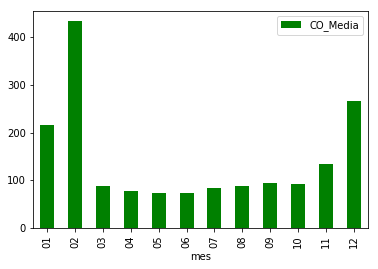

In [62]:
df_tablaCD.groupby("mes")['CO_Media'].mean().plot(kind = 'bar', legend = 'Reverese', color='green')

In [29]:
## Empezamos tratamiento de datos, datos faltantes

In [30]:
df_tablaGN = df_tablaGN.reset_index()
si_tablaGN  = SimpleImputer()
si_tablaGN.fit(df_tablaGN[['SO2_Media','SO2_Mediana','SO2_Max','SO2_Min','PART_Media','PART_Mediana','PART_Max','PART_Min','NO2_Media', 'NO2_Mediana', 'NO2_Max', 'NO2_Min', 'CO_Media', 'CO_Mediana', 'CO_Max', 'CO_Min']])

df_tablaPC = df_tablaPC.reset_index()
si_tablaPC  = SimpleImputer()
si_tablaPC.fit(df_tablaPC[['SO2_Media','SO2_Mediana','SO2_Max','SO2_Min','PART_Media','PART_Mediana','PART_Max','PART_Min','NO2_Media', 'NO2_Mediana', 'NO2_Max', 'NO2_Min', 'CO_Media', 'CO_Mediana', 'CO_Max', 'CO_Min']])

df_tablaCD = df_tablaCD.reset_index()
si_tablaCD  = SimpleImputer()
si_tablaCD.fit(df_tablaCD[['SO2_Media','SO2_Mediana','SO2_Max','SO2_Min','PART_Media','PART_Mediana','PART_Max','PART_Min','NO2_Media', 'NO2_Mediana', 'NO2_Max', 'NO2_Min', 'CO_Media', 'CO_Mediana', 'CO_Max', 'CO_Min']])

SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)

In [32]:
df_tablaGN["SO2_Media"] = si_tablaGN.fit_transform(df_tablaGN["SO2_Media"].values.reshape(-1, 1))
df_tablaGN["SO2_Mediana"] = si_tablaGN.fit_transform(df_tablaGN["SO2_Mediana"].values.reshape(-1, 1))
df_tablaGN["SO2_Max"] = si_tablaGN.fit_transform(df_tablaGN["SO2_Max"].values.reshape(-1, 1))
df_tablaGN["SO2_Min"] = si_tablaGN.fit_transform(df_tablaGN["SO2_Min"].values.reshape(-1, 1))
df_tablaGN["PART_Media"] = si_tablaGN.fit_transform(df_tablaGN["PART_Media"].values.reshape(-1, 1))
df_tablaGN["PART_Mediana"] = si_tablaGN.fit_transform(df_tablaGN["PART_Mediana"].values.reshape(-1, 1))
df_tablaGN["PART_Max"] = si_tablaGN.fit_transform(df_tablaGN["PART_Max"].values.reshape(-1, 1))
df_tablaGN["PART_Min"] = si_tablaGN.fit_transform(df_tablaGN["PART_Min"].values.reshape(-1, 1))
df_tablaGN["NO2_Media"] = si_tablaGN.fit_transform(df_tablaGN["NO2_Media"].values.reshape(-1, 1))
df_tablaGN["NO2_Mediana"] = si_tablaGN.fit_transform(df_tablaGN["NO2_Mediana"].values.reshape(-1, 1))
df_tablaGN["NO2_Max"] = si_tablaGN.fit_transform(df_tablaGN["NO2_Max"].values.reshape(-1, 1))
df_tablaGN["NO2_Min"] = si_tablaGN.fit_transform(df_tablaGN["NO2_Min"].values.reshape(-1, 1))
df_tablaGN["CO_Media"] = si_tablaGN.fit_transform(df_tablaGN["CO_Media"].values.reshape(-1, 1))
df_tablaGN["CO_Mediana"] = si_tablaGN.fit_transform(df_tablaGN["CO_Mediana"].values.reshape(-1, 1))
df_tablaGN["CO_Max"] = si_tablaGN.fit_transform(df_tablaGN["CO_Max"].values.reshape(-1, 1))
df_tablaGN["CO_Min"] = si_tablaGN.fit_transform(df_tablaGN["CO_Min"].values.reshape(-1, 1))

df_tablaPC["SO2_Media"] = si_tablaPC.fit_transform(df_tablaPC["SO2_Media"].values.reshape(-1, 1))
df_tablaPC["SO2_Mediana"] = si_tablaPC.fit_transform(df_tablaPC["SO2_Mediana"].values.reshape(-1, 1))
df_tablaPC["SO2_Max"] = si_tablaPC.fit_transform(df_tablaPC["SO2_Max"].values.reshape(-1, 1))
df_tablaPC["SO2_Min"] = si_tablaPC.fit_transform(df_tablaPC["SO2_Min"].values.reshape(-1, 1))
df_tablaPC["PART_Media"] = si_tablaPC.fit_transform(df_tablaPC["PART_Media"].values.reshape(-1, 1))
df_tablaPC["PART_Mediana"] = si_tablaPC.fit_transform(df_tablaPC["PART_Mediana"].values.reshape(-1, 1))
df_tablaPC["PART_Max"] = si_tablaPC.fit_transform(df_tablaPC["PART_Max"].values.reshape(-1, 1))
df_tablaPC["PART_Min"] = si_tablaPC.fit_transform(df_tablaPC["PART_Min"].values.reshape(-1, 1))
df_tablaPC["NO2_Media"] = si_tablaPC.fit_transform(df_tablaPC["NO2_Media"].values.reshape(-1, 1))
df_tablaPC["NO2_Mediana"] = si_tablaPC.fit_transform(df_tablaPC["NO2_Mediana"].values.reshape(-1, 1))
df_tablaPC["NO2_Max"] = si_tablaPC.fit_transform(df_tablaPC["NO2_Max"].values.reshape(-1, 1))
df_tablaPC["NO2_Min"] = si_tablaPC.fit_transform(df_tablaPC["NO2_Min"].values.reshape(-1, 1))
df_tablaPC["CO_Media"] = si_tablaPC.fit_transform(df_tablaPC["CO_Media"].values.reshape(-1, 1))
df_tablaPC["CO_Mediana"] = si_tablaPC.fit_transform(df_tablaPC["CO_Mediana"].values.reshape(-1, 1))
df_tablaPC["CO_Max"] = si_tablaPC.fit_transform(df_tablaPC["CO_Max"].values.reshape(-1, 1))
df_tablaPC["CO_Min"] = si_tablaPC.fit_transform(df_tablaPC["CO_Min"].values.reshape(-1, 1))

df_tablaCD["SO2_Media"] = si_tablaCD.fit_transform(df_tablaCD["SO2_Media"].values.reshape(-1, 1))
df_tablaCD["SO2_Mediana"] = si_tablaCD.fit_transform(df_tablaCD["SO2_Mediana"].values.reshape(-1, 1))
df_tablaCD["SO2_Max"] = si_tablaCD.fit_transform(df_tablaCD["SO2_Max"].values.reshape(-1, 1))
df_tablaCD["SO2_Min"] = si_tablaCD.fit_transform(df_tablaCD["SO2_Min"].values.reshape(-1, 1))
df_tablaCD["PART_Media"] = si_tablaCD.fit_transform(df_tablaCD["PART_Media"].values.reshape(-1, 1))
df_tablaCD["PART_Mediana"] = si_tablaCD.fit_transform(df_tablaCD["PART_Mediana"].values.reshape(-1, 1))
df_tablaCD["PART_Max"] = si_tablaCD.fit_transform(df_tablaCD["PART_Max"].values.reshape(-1, 1))
df_tablaCD["PART_Min"] = si_tablaCD.fit_transform(df_tablaCD["PART_Min"].values.reshape(-1, 1))
df_tablaCD["NO2_Media"] = si_tablaCD.fit_transform(df_tablaCD["NO2_Media"].values.reshape(-1, 1))
df_tablaCD["NO2_Mediana"] = si_tablaCD.fit_transform(df_tablaCD["NO2_Mediana"].values.reshape(-1, 1))
df_tablaCD["NO2_Max"] = si_tablaCD.fit_transform(df_tablaCD["NO2_Max"].values.reshape(-1, 1))
df_tablaCD["NO2_Min"] = si_tablaCD.fit_transform(df_tablaCD["NO2_Min"].values.reshape(-1, 1))
df_tablaCD["CO_Media"] = si_tablaCD.fit_transform(df_tablaCD["CO_Media"].values.reshape(-1, 1))
df_tablaCD["CO_Mediana"] = si_tablaCD.fit_transform(df_tablaCD["CO_Mediana"].values.reshape(-1, 1))
df_tablaCD["CO_Max"] = si_tablaCD.fit_transform(df_tablaCD["CO_Max"].values.reshape(-1, 1))
df_tablaCD["CO_Min"] = si_tablaCD.fit_transform(df_tablaCD["CO_Min"].values.reshape(-1, 1))